In [1]:
import numpy as np
import pandas as pd
data0 = pd.read_csv('2345.csv', index_col = None)
data0.head(2)

,Formula,band_gap,density,vpa,packing fraction,avg d valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,transition metal fraction,...,avg_dev Electronegativity,mean NdValence,avg_dev NdValence,avg_dev NValence,avg_dev NUnfilled,range GSvolume_pa,mean GSvolume_pa,mean GSbandgap,mean SpaceGroupNumber,avg_dev SpaceGroupNumber
0,Ba2CuGe2O7,0.196,4.845679,17.005026,0.569741,2.50,0.270588,0.376471,0.352941,0.083333,...,0.923611,2.50,3.7500,2.958333,0.791667,54.485000,20.666250,0.063833,101.416667,104.319444
1,EuLi2GeS4,0.205,3.652473,20.841910,0.461800,1.25,0.285714,0.367347,0.204082,0.000000,...,0.664531,1.25,2.1875,2.687500,1.437500,19.866667,24.474896,1.148875,149.000000,79.000000


In [2]:
data_corresponding = data0.corr()['band_gap'].abs().sort_values(ascending=False)[:10]
data_corresponding

band_gap                    1.000000
 mean Row                   0.825915
frac d valence electrons    0.814830
frac p valence electrons    0.807470
 mean Number                0.785350
 mean CovalentRadius        0.770352
 mean AtomicWeight          0.767240
 avg_dev NdValence          0.757857
frac s valence electrons    0.742821
avg d valence electrons     0.734174
Name: band_gap, dtype: float64

<AxesSubplot:>

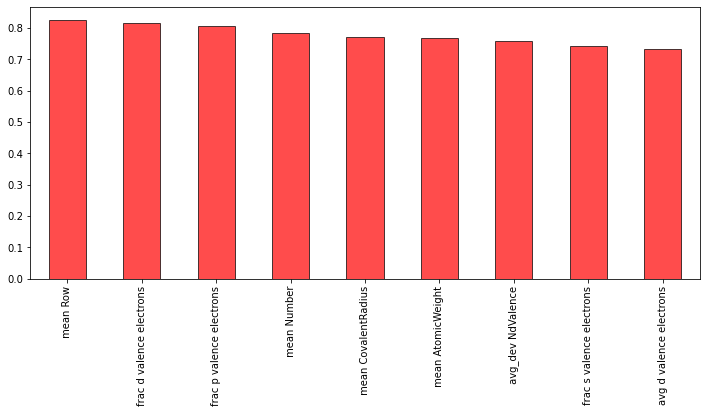

In [4]:
data_corresponding.drop('band_gap').plot(kind = 'bar', rot = 90,colormap ='flag', edgecolor = 'k', alpha=0.7, figsize = (12,5))


In [5]:
y = data0['band_gap'].values
excluded = ['band_gap', 'Formula']
X = data0.drop(excluded,axis=1)

print("There are %s possible dedscriptor:\n"%X.shape[1])
print('%s'%X.columns.values)

There are 35 possible dedscriptor:

['density' 'vpa' 'packing fraction' 'avg d valence electrons'
 'frac s valence electrons' 'frac p valence electrons'
 'frac d valence electrons' 'transition metal fraction' ' mean Number'
 ' avg_dev Number' ' avg_dev MendeleevNumber' ' mean AtomicWeight'
 ' avg_dev AtomicWeight' ' mean MeltingT' ' avg_dev MeltingT'
 ' mode MeltingT' ' avg_dev Column' ' mean Row' ' avg_dev Row'
 ' range CovalentRadius' ' mean CovalentRadius' ' avg_dev CovalentRadius'
 ' mode CovalentRadius' ' range Electronegativity'
 ' mean Electronegativity' ' avg_dev Electronegativity' ' mean NdValence'
 ' avg_dev NdValence' ' avg_dev NValence' ' avg_dev NUnfilled'
 ' range GSvolume_pa' ' mean GSvolume_pa' ' mean GSbandgap'
 ' mean SpaceGroupNumber' ' avg_dev SpaceGroupNumber']


In [6]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 8)

In [7]:
X_train

,density,vpa,packing fraction,avg d valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,transition metal fraction,mean Number,avg_dev Number,...,avg_dev Electronegativity,mean NdValence,avg_dev NdValence,avg_dev NValence,avg_dev NUnfilled,range GSvolume_pa,mean GSvolume_pa,mean GSbandgap,mean SpaceGroupNumber,avg_dev SpaceGroupNumber
126,7.135210,15.259807,0.358804,3.684211,0.165217,0.286957,0.304348,0.0,27.578947,24.731302,...,0.662825,3.684211,4.653740,7.711911,0.664820,23.845000,16.319737,0.060474,45.631579,56.642659
109,5.072445,15.558426,0.301501,2.142857,0.205882,0.367647,0.220588,0.0,20.285714,19.591837,...,0.359082,2.142857,3.367347,6.122449,0.612245,19.005000,13.830179,0.976643,68.571429,80.530612
247,2.882928,12.665249,0.584301,0.000000,0.425000,0.575000,0.000000,0.0,10.222222,5.950617,...,0.841975,0.000000,0.000000,1.728395,1.407407,83.550000,17.529444,0.508000,87.444444,83.827160
234,3.968815,11.974080,0.529675,0.000000,0.442308,0.557692,0.000000,0.0,12.666667,10.833333,...,0.836424,0.000000,0.000000,1.805556,1.291667,56.975000,15.225000,1.035417,92.791667,87.524306
202,2.437976,9.707038,0.491025,0.000000,0.437500,0.562500,0.000000,0.0,7.000000,2.200000,...,0.850500,0.000000,0.000000,2.000000,1.250000,22.628333,11.393625,1.166300,101.250000,89.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2.537371,10.201759,0.554714,0.000000,0.425000,0.575000,0.000000,0.0,7.600000,2.760000,...,1.075000,0.000000,0.000000,2.000000,0.920000,11.335000,13.222500,0.077300,119.900000,107.900000
71,4.421562,13.960630,0.446830,2.500000,0.250000,0.416667,0.333333,0.0,16.750000,12.375000,...,0.832812,2.500000,3.750000,3.500000,0.625000,22.455000,16.166667,0.047875,85.000000,91.250000
106,3.672214,45.022865,0.507841,7.142857,0.146341,0.243902,0.609756,0.0,42.571429,7.510204,...,0.832653,7.142857,4.081633,6.122449,0.244898,71.227500,49.418571,0.719714,129.714286,75.102041
270,2.545378,12.485611,0.316618,0.000000,0.425000,0.575000,0.000000,0.0,8.923077,3.781065,...,0.783728,0.000000,0.000000,1.597633,1.437870,56.417500,11.306186,0.527538,82.000000,80.769231


In [8]:
model_RFR = RandomForestRegressor(random_state=55, max_features= 'sqrt',
                                  min_samples_leaf= 1, min_samples_split= 3, 
                                  n_estimators= 50)
r2_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring = 'r2',
                                cv = crossvalidation)
rmse_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring = 'neg_root_mean_squared_error',
                                  cv = crossvalidation)
MAE_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring='neg_mean_absolute_error',
                                 cv = crossvalidation)

print()
print('RFR train magmom Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_RFR), np.mean(r2_scores_RFR)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_RFR), -np.mean(rmse_scores_RFR)))
print('Folds: %i, mean MAE: %3f' % (len(MAE_scores_RFR), -np.mean(MAE_scores_RFR)))
print()

RFR_test = model_RFR.fit(X_train, y_train)
y_RFR_predict = model_RFR.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_scores_RFR_test = r2_score(y_test, y_RFR_predict)
rmse_scores_RFR_test = np.sqrt(mean_squared_error(y_test, y_RFR_predict))
mae_scores_RFR_test = mean_absolute_error(y_test, y_RFR_predict)

print()
print('RFR predict magmom results:')
print('mean R2: %3f' % (r2_scores_RFR_test))
print('mean RMSE: %3f' % (rmse_scores_RFR_test))
print('mean MAE: %3f' % (mae_scores_RFR_test))
print()


RFR train magmom Cross-validation results:
Folds: 10, mean R2: 0.815035
Folds: 10, mean RMSE: 0.643240
Folds: 10, mean MAE: 0.445968


RFR predict magmom results:
mean R2: 0.872599
mean RMSE: 0.591701
mean MAE: 0.440986



In [9]:
import shap
shap.initjs()
import matplotlib.pyplot as plt
import matplotlib as mpl

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [10]:
explainer = shap.Explainer(model_RFR)
shap_values = explainer.shap_values(X)
print(shap_values[1].shape)

(35,)


In [11]:
explainer = shap.Explainer(model_RFR, X,check_additivity=False)
shap_values = explainer(X,check_additivity=False)

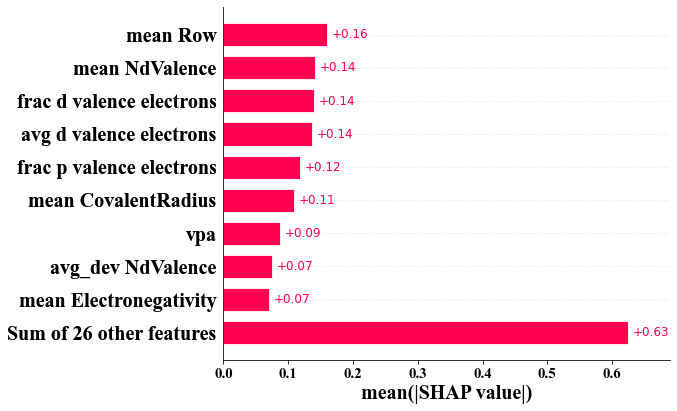

In [12]:
shap.plots.bar(shap_values,show = False)
plt.xticks( fontproperties='Times New Roman', fontsize=15, weight='bold') #设置x坐标字体和大小
plt.yticks(fontproperties='Times New Roman', fontsize=20, weight='bold') #设置y坐标字体和大小
plt.xlabel('mean(|SHAP value|)', fontproperties='Times New Roman',
           fontsize=20, weight='bold')#设置x轴标签和大小
plt.savefig('训练集.png', dpi=600,format = 'png',bbox_inches='tight')

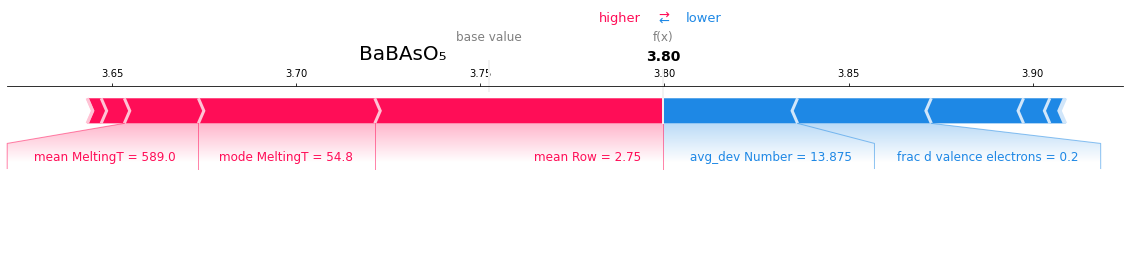

In [13]:
shap.plots.force(shap_values[130,6:18], X.iloc[130,:],matplotlib = True,show = False)
#RbNb2PSe10四元化合物
fig = plt.gcf()



# 遍历子元素，找到文本元素并修改其字体大小
for text in fig.texts:
    text.set_fontsize(18)
fig.text(0.4, 1, 'BaBAsO₅', ha='center', fontsize=20) 
plt.savefig("训练集单个样本4.jpg", dpi=1000, bbox_inches='tight') #可以保存图片

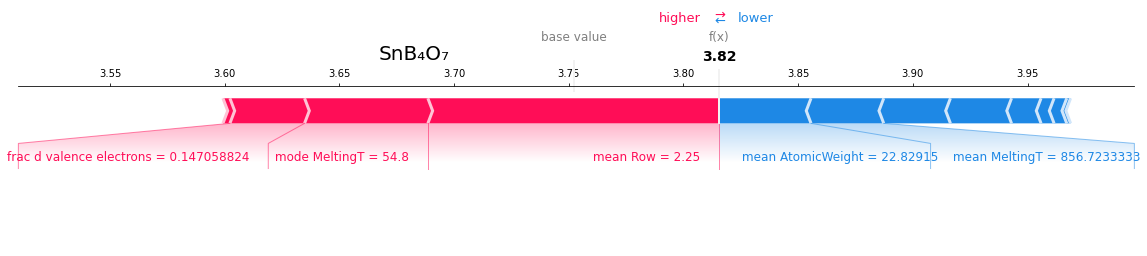

In [14]:
shap.plots.force(shap_values[132,6:18], X.iloc[132,:],matplotlib = True,show = False)
#RbNb2PSe10四元化合物
fig = plt.gcf()



# 遍历子元素，找到文本元素并修改其字体大小
for text in fig.texts:
    text.set_fontsize(18)
fig.text(0.4, 1, 'SnB₄O₇', ha='center', fontsize=20)
plt.savefig("训练集单个样本8.jpg", dpi=300, bbox_inches='tight') #可以保存图片

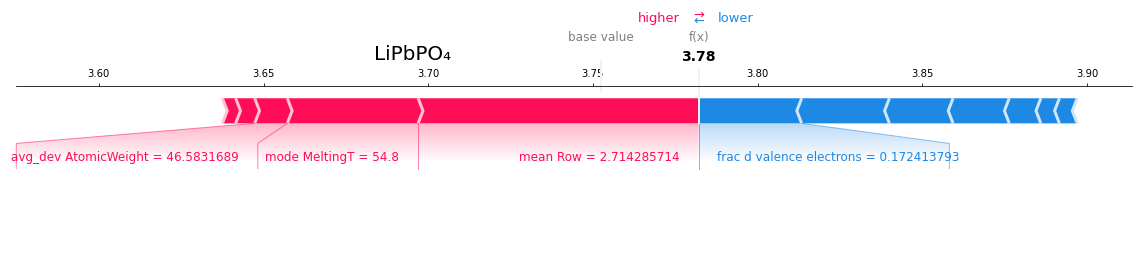

In [15]:
shap.plots.force(shap_values[127,6:18], X.iloc[127,:],matplotlib = True,show = False)
#RbNb2PSe10四元化合物
fig = plt.gcf()



# 遍历子元素，找到文本元素并修改其字体大小
for text in fig.texts:
    text.set_fontsize(18)
fig.text(0.4, 1, 'LiPbPO₄', ha='center', fontsize=20)
plt.savefig("训练集单个样本9.jpg", dpi=300, bbox_inches='tight') #可以保存图片